In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)

pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

### Load data into a dataframe for preprocessing

In [3]:
#df = pd.read_csv('../../Analysis2/02.Result-X202SC22063599-Z01-F004-meta/result/05.FunctionAnnotation/KEGG/top/table/table.level1.tran10.xls', sep="\t", index_col='KO_Pathway_Level1')
df = pd.read_csv('../../Analysis2/02.Result-X202SC22063599-Z01-F004-meta/result/04.TaxAnnotation/MetaStats/species/species_diff_relative_detail.xls', sep="\t", index_col='species')

df

,P222,P216,P164,P193,P174,P215,P200,P163,P168,P197,...,P248,P228,P213,P240,P117,P107,P244,P132,P241,detail
species,,,,,,,,,,,,,,,,,,,,,
g__Porphyromonas;s__Porphyromonas gingivalis,0.093717,2.408590e-03,0.108082,5.560200e-03,0.041806,0.116327,0.032434,3.824465e-02,0.041259,0.015717,...,0.000390,0.000201,0.000718,0.002115,0.000634,0.001722,0.001167,0.000376,0.000317,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Porphyromonad...
g__Prevotella;s__Prevotella denticola,0.001248,2.817679e-04,0.004528,1.905349e-04,0.000194,0.000266,0.000900,4.992196e-04,0.007454,0.001605,...,0.009527,0.000276,0.003618,0.000513,0.004072,0.005451,0.003060,0.002694,0.000126,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellacea...
g__Alloprevotella;s__Alloprevotella tannerae,0.002816,1.300649e-04,0.027590,1.831769e-04,0.000537,0.000410,0.007852,4.841546e-03,0.001977,0.004529,...,0.006418,0.000401,0.016519,0.023060,0.012587,0.024318,0.019253,0.014533,0.000197,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellacea...
g__Actinomyces;s__Actinomyces dentalis,0.005492,2.766049e-04,0.012336,6.103870e-04,0.002182,0.001665,0.002956,2.640986e-03,0.002656,0.001421,...,0.008085,0.000788,0.011032,0.006275,0.007015,0.017193,0.012519,0.010824,0.004435,k__Bacteria;p__Actinomycetota;c__Actinomycetes;o__Actinomycetales;f__Actinom...
g__Corynebacterium;s__Corynebacterium matruchotii,0.007140,3.572870e-05,0.000341,4.516112e-04,0.000336,0.001609,0.003713,6.281771e-04,0.002980,0.007311,...,0.009327,0.013046,0.006101,0.002228,0.006291,0.005026,0.003585,0.006917,0.000504,k__Bacteria;p__Actinomycetota;c__Actinomycetes;o__Mycobacteriales;f__Coryneb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g__Saccharopolyspora;s__uncultured Saccharopolyspora sp.,0.000000,5.421879e-07,0.000000,5.231570e-07,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria;p__Actinomycetota;c__Actinomycetes;o__Pseudonocardiales;f__Pseud...
g__Erysiphe;s__Erysiphe pulchra,0.000000,5.421879e-07,0.000000,5.231570e-07,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Eukaryota;p__Ascomycota;c__Leotiomycetes;o__Erysiphales;f__Erysiphaceae;g...
g__Idiomarina;s__Idiomarina xiamenensis,0.000000,5.323299e-07,0.000000,5.136450e-07,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Alteromonadales;f__I...


In [4]:
# Designate sample groups
groups={
    "P222": "G1",
    "P216": "G1",
    "P164": "G1",
    "P193": "G1",
    "P174": "G1",
    "P215": "G1",
    "P200": "G1",
    "P163": "G1",
    "P168": "G1",
    "P197": "G1",
    "P217": "G1",
    "P160": "G1",
    "P177": "G1",
    "P151": "G1",
    "P171": "G2",
    "P239": "G2",
    "P115": "G2",
    "P236": "G2",
    "P70":  "G2",
    "P99":  "G2",
    "P234": "G2",
    "P248": "G2",
    "P228": "G2",
    "P213": "G2",
    "P240": "G2",
    "P117": "G2",
    "P107": "G2",
    "P244": "G2",
    "P132": "G2",
    "P241": "G2"
}

In [7]:
df_grp = df.T.groupby(groups).sum()
df_grp

species,g__Porphyromonas;s__Porphyromonas gingivalis,g__Prevotella;s__Prevotella denticola,g__Alloprevotella;s__Alloprevotella tannerae,g__Actinomyces;s__Actinomyces dentalis,g__Corynebacterium;s__Corynebacterium matruchotii,g__Treponema;s__Treponema denticola,g__Unclassified;s__Bacteroidetes oral taxon 274,g__Desulfomicrobium;s__Desulfomicrobium orale,g__Prevotella;s__Prevotella nigrescens,g__Streptococcus;s__Streptococcus gordonii,...,g__Deinococcus;s__Deinococcus aquaedulcis,g__Gigaspora;s__Gigaspora margarita,g__Geosiphon;s__Geosiphon pyriformis,g__Wolbachia;s__Wolbachia endosymbiont group A of Gymnosoma rotundatum,g__Acinetobacter;s__Acinetobacter sp. NIPH 298,g__Saccharopolyspora;s__uncultured Saccharopolyspora sp.,g__Erysiphe;s__Erysiphe pulchra,g__Idiomarina;s__Idiomarina xiamenensis,g__Cellvibrio;s__Cellvibrio sp. PSBB023,g__Prevotella;s__Prevotella sp. MGM2
G1,0.638312,0.023702,0.083876,0.070076,0.051973,0.217208,0.011784,0.041679,0.047059,0.005692,...,9.200274e-07,5.658178e-07,5.650095e-07,5.638818e-07,7.993838e-07,0.000001,0.000001,0.000001,7.962008e-07,6.680766e-07
G2,0.014637,0.156334,0.310564,0.182659,0.146717,0.072823,0.073166,0.000267,0.159895,0.060432,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [8]:
# Descriptive analyses

In [9]:
np.count_nonzero(df_grp.T.G1)

1201

In [10]:
np.count_nonzero(df_grp.T.G2)

630

In [11]:
np.count_nonzero(df_grp.T.G1+df_grp.T.G2)

1484

In [12]:
np.count_nonzero(df_grp.T.G1*df_grp.T.G2)

347

### Create Venn diagram
For an introduction to Python Venn package: https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305

In [13]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

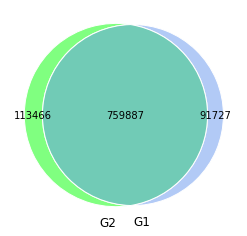

In [14]:
c=venn2(subsets = (113466, 91727, 759887), set_labels = ('G2','G1'), set_colors=('#80FF80', '#B2CAF6'))
#c.get_patch_by_id('10').set_color('red')
#c.get_patch_by_id('01').set_color('blue')
c.get_patch_by_id('10').set_edgecolor('white')
c.get_patch_by_id('01').set_edgecolor('white')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)

c.get_patch_by_id('11').set_color('#71CBB6')
c.get_patch_by_id('11').set_edgecolor('white')
c.get_patch_by_id('11').set_alpha(1)

#plt.show()

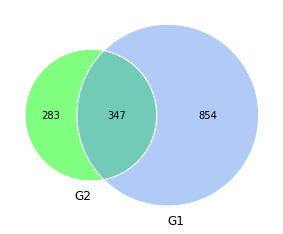

In [15]:
c=venn2(subsets = (630-347, 1201-347, 347), set_labels = ('G2','G1'), set_colors=('#80FF80', '#B2CAF6'))
#c.get_patch_by_id('10').set_color('red')
#c.get_patch_by_id('01').set_color('blue')
c.get_patch_by_id('10').set_edgecolor('white')
c.get_patch_by_id('01').set_edgecolor('white')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)

c.get_patch_by_id('11').set_color('#71CBB6')
c.get_patch_by_id('11').set_edgecolor('white')
c.get_patch_by_id('11').set_alpha(1)

plt.show()

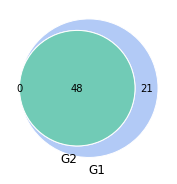

In [16]:
plt.rc("figure", figsize=(4, 3))
c=venn2(subsets = (0, 69-48, 48), set_labels = ('G2', 'G1'), set_colors=('#80FF80', '#B2CAF6'))

c.get_patch_by_id('10').set_edgecolor('white')
c.get_patch_by_id('01').set_edgecolor('white')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)

c.get_patch_by_id('11').set_color('#71CBB6')
c.get_patch_by_id('11').set_edgecolor('white')
c.get_patch_by_id('11').set_alpha(1)

#plt.show()
plt.savefig("Fig. 7A.pdf", format="pdf", bbox_inches="tight")

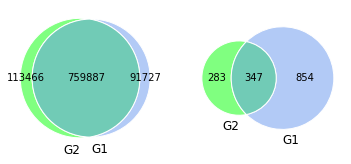

In [39]:
# Combine the two Venn diagrams above into Figure 3
plt.rc("figure", figsize=(6, 4))
fig = plt.figure() 

ax1 = fig.add_subplot(1, 2, 1)

c=venn2(subsets = (113466, 91727, 759887), set_labels = ('G2','G1'), set_colors=('#80FF80', '#B2CAF6'))
c.get_patch_by_id('10').set_edgecolor('white')
c.get_patch_by_id('01').set_edgecolor('white')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)

c.get_patch_by_id('11').set_color('#71CBB6')
c.get_patch_by_id('11').set_edgecolor('white')
c.get_patch_by_id('11').set_alpha(1)

ax2 = fig.add_subplot(1, 2, 2) 

c=venn2(subsets = (630-347, 1201-347, 347), set_labels = ('G2','G1'), set_colors=('#80FF80', '#B2CAF6'))
c.get_patch_by_id('10').set_edgecolor('white')
c.get_patch_by_id('01').set_edgecolor('white')
c.get_patch_by_id('10').set_alpha(1)
c.get_patch_by_id('01').set_alpha(1)

c.get_patch_by_id('11').set_color('#71CBB6')
c.get_patch_by_id('11').set_edgecolor('white')
c.get_patch_by_id('11').set_alpha(1)

plt.savefig("Fig.3.pdf", format="pdf", bbox_inches="tight")

In [40]:
plt.close('all')